In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
df = pd.read_csv('BostonHousing.csv')
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [19]:
X = df.drop('medv', axis=1)
y = df['medv']

from sklearn.impute import SimpleImputer

# Ganti 0 dengan NaN terlebih dahulu
df[['crim', 'nox']] = df[['crim', 'nox']].replace(0, np.nan)

# Imputasi dengan median
imputer = SimpleImputer(strategy='median')
df[['crim', 'nox']] = imputer.fit_transform(df[['crim', 'nox']])

df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}


grid_search = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error'
)

# Inisialisasi model Bagging
bag_model = BaggingRegressor(
    n_estimators=100,
    random_state=42
)

# Melatih model Boosting
grid_search.fit(X_train, y_train)

# Melatih model Bagging
bag_model.fit(X_train, y_train)

# Membuat prediksi
boost_pred = grid_search.predict(X_test)
bag_pred = bag_model.predict(X_test)

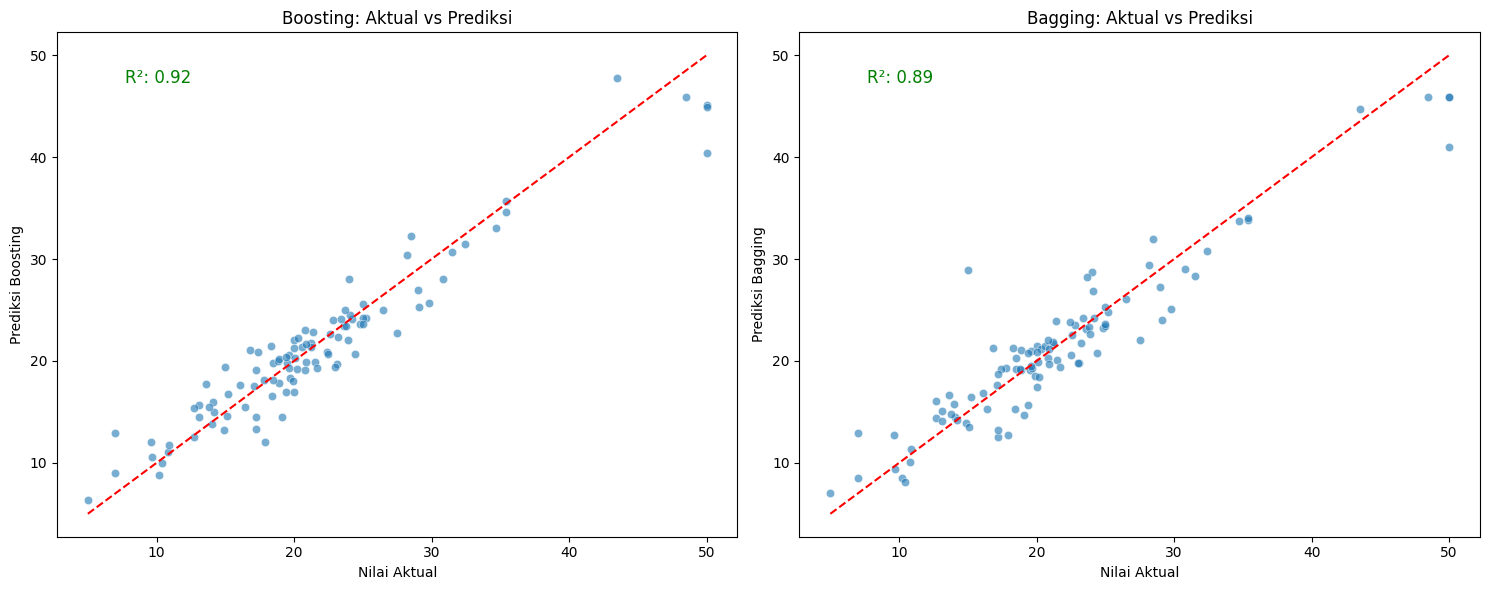

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))

# Plot Aktual vs Prediksi Boosting
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=boost_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Boosting: Aktual vs Prediksi')
plt.xlabel('Nilai Aktual')
plt.ylabel('Prediksi Boosting')
plt.annotate(f'R²: {r2_score(y_test, boost_pred):.2f}', 
             xy=(0.1, 0.9), xycoords='axes fraction', 
             fontsize=12, color='green')

# Plot Aktual vs Prediksi Bagging
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=bag_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Bagging: Aktual vs Prediksi')
plt.xlabel('Nilai Aktual')
plt.ylabel('Prediksi Bagging')
plt.annotate(f'R²: {r2_score(y_test, bag_pred):.2f}', 
             xy=(0.1, 0.9), xycoords='axes fraction', 
             fontsize=12, color='green')

plt.tight_layout()
plt.show()

In [32]:
# Evaluasi performa
def evaluate_model(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f'{name} Performance:')
    print(f'MSE: {mse:.2f}')
    print(f'RMSE: {rmse:.2f}')
    print(f'R²: {r2:.2f}\n')

evaluate_model('Gradient Boosting', y_test, boost_pred)
evaluate_model('Bagging', y_test, bag_pred)

Gradient Boosting Performance:
MSE: 6.21
RMSE: 2.49
R²: 0.92

Bagging Performance:
MSE: 8.09
RMSE: 2.84
R²: 0.89



# 📊 Persamaan Matematika Model Boosting & Bagging

Notebook ini menggunakan dua algoritma machine learning utama untuk regresi harga mobil:

- **Gradient Boosting Regressor** (Boosting)
- **Random Forest Regressor** (Bagging)

---

## 1. Gradient Boosting Regressor (Boosting)

Gradient Boosting adalah teknik ensemble yang menggabungkan beberapa model lemah (pohon keputusan) secara bertahap untuk meminimalkan fungsi kerugian.

### Model Umum:

\[
F_M(x) = \sum_{m=1}^{M} \gamma_m h_m(x)
\]

Keterangan:
- \( M \): jumlah total iterasi (jumlah pohon)
- \( h_m(x) \): model pohon keputusan ke-\(m\)
- \( \gamma_m \): learning rate (dalam program: `learning_rate = 0.5`)

### Langkah Pembaruan Tiap Iterasi:

\[
r_{im} = -\left[\frac{\partial L(y_i, F(x_i))}{\partial F(x_i)}\right]_{F(x)=F_{m-1}(x)}
\]

Kemudian:

\[
F_m(x) = F_{m-1}(x) + \gamma_m h_m(x)
\]

---

## 2. Random Forest Regressor (Bagging)

Random Forest adalah teknik ansambel berbasis bagging, yang membangun banyak pohon keputusan secara paralel dari subset data dan fitur secara acak.

### Model Umum:

\[
\hat{f}(x) = \frac{1}{T} \sum_{t=1}^{T} f_t(x)
\]

Keterangan:
- \( T \): jumlah pohon dalam hutan (`n_estimators = 200`)
- \( f_t(x) \): prediksi dari pohon ke-\(t\)
- Setiap pohon dilatih dengan data bootstrap dan subset acak fitur

---

## 3. Evaluasi Model

Model dievaluasi menggunakan dua metrik utama:

### Mean Squared Error (MSE):

\[
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
\]

### Koefisien Determinasi (R²):

\[
R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
\]

---
